# 1. Imports of essential modules/ Global settings

### 1.1 Modules

In [137]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import Imputer

### 1.2 Visualising settings

In [138]:
plt.style.use('dark_background')

# 2. Data upload from an external file & preprocessing raw data

### 2.1 Reading a file

In [139]:
df = pd.read_csv("./data/ALL_GPUs.CSV")

### 2.2 Selecting interesting parameters(columns)

In [140]:
columns = ["Best_Resolution", "Core_Speed", "Manufacturer", "Memory", "Memory_Bandwidth", 
           "Memory_Bus", "Memory_Speed","Release_Date"]

In [141]:
df = df[columns]
df.head(5)

,Best_Resolution,Core_Speed,Manufacturer,Memory,Memory_Bandwidth,Memory_Bus,Memory_Speed,Release_Date
0,NaN,738 MHz,Nvidia,1024 MB,64GB/sec,256 Bit,1000 MHz,\n01-Mar-2009
1,1366 x 768,\n-,AMD,512 MB,106GB/sec,512 Bit,828 MHz,\n14-May-2007
2,1366 x 768,\n-,AMD,512 MB,51.2GB/sec,256 Bit,800 MHz,\n07-Dec-2007
3,1024 x 768,\n-,AMD,256 MB,36.8GB/sec,128 Bit,1150 MHz,\n01-Jul-2007
4,1024 x 768,\n-,AMD,256 MB,22.4GB/sec,128 Bit,700 MHz,\n28-Jun-2007


In [142]:
df['Release_Date'] = df['Release_Date'].str[1:-1]
df=df[df['Release_Date'].str.len()==11]
df['Release_Date'] = pd.to_datetime(df['Release_Date'], format='%d-%b-%Y')

In [143]:
release_year = df['Release_Date'].dt.year
release_month = df['Release_Date'].dt.month
release_day = df['Release_Date'].dt.day
df['Release'] = release_year + release_month/12 + release_day/30.4375 #30.4375 -> mean of all days in a single month

# 3. Memory speed 

In [144]:
df['Memory_Speed_Value'] = df['Memory_Speed'].str[0:-3].fillna(0).astype(int)

In [145]:
X = df['Release'].values
Y = df['Memory_Speed_Value'].values

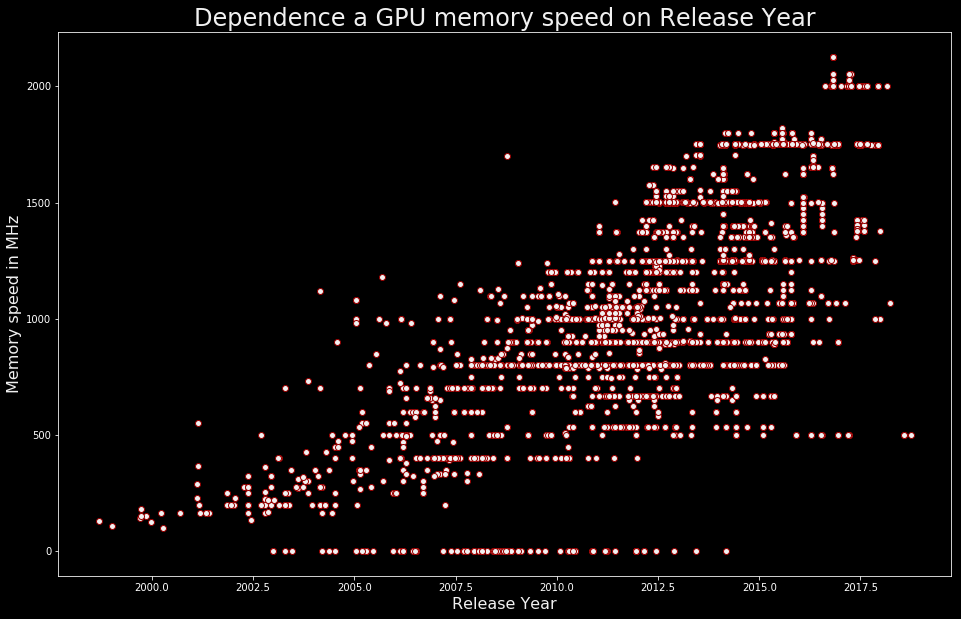

In [151]:
plt.figure(figsize=(16, 10))
plt.title("Dependence a GPU memory speed on Release Year", fontsize = 24, color = "#f1f1f1")
plt.xlabel("Release Year", fontsize = 16, color = "#f1f1f1")
plt.ylabel("Memory speed in MHz", fontsize = 16, color = "#f1f1f1")
plt.scatter(x = X, y = Y, c = "#f1f1f1", edgecolors = "#990000")